In [1]:
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
# import graphviz
# Scaling with Minmax-scaler
from sklearn.preprocessing import MinMaxScaler

# from ydata_profiling import ProfileReport

# import custom functions
from custom_functions import our_metrics

pd.set_option('display.max_rows', 10)

import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [2]:
df_raw = pd.read_csv("../data/petfinder-adoption-prediction/train/train.csv")
df_raw.columns = df_raw.columns.str.lower() #make column names lowercase

In [3]:
df_description = df_raw.query('adoptionspeed == 0 or adoptionspeed == 1 ').description

In [4]:
df_description.head()

1     I just found it alone yesterday near my apartm...
6     anyone within the area of ipoh or taiping who ...
8     healthy and active, feisty kitten found in nei...
10    For serious adopter, please do sms or call for...
11    Kali is a super playful kitten who is on the g...
Name: description, dtype: object

In [5]:
#create list from the description column
text = df_description.tolist() 

# to lower case
text = str(text)
#already lower case


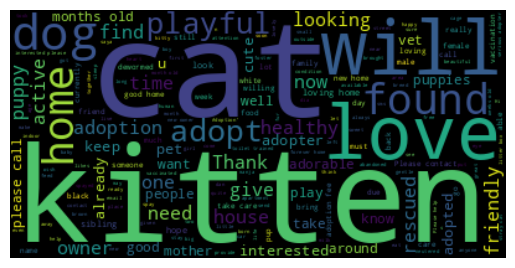

In [6]:
#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [7]:
# create a dictionary of word frequencies
text_dictionary = wordcloud.process_text(text)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

#print results
print(list(word_freq.items())[:5])
print(list(rel_freq.items())[:5])

[('cat', 1061), ('kitten', 995), ('will', 927), ('love', 892), ('dog', 880)]
[('cat', 1.0), ('kitten', 0.937794533459001), ('will', 0.8737040527803959), ('love', 0.8407163053722903), ('dog', 0.8294062205466541)]


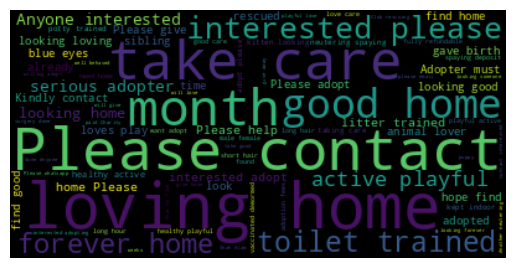

In [8]:
#create more stopwords list
stop_words = ["cats", "kittens", "week", "dogs", "call"] + list(STOPWORDS)

#create the wordcloud object
wordcloud = WordCloud(stopwords = stop_words,
                      collocations=True, min_word_length = 4, collocation_threshold=3).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

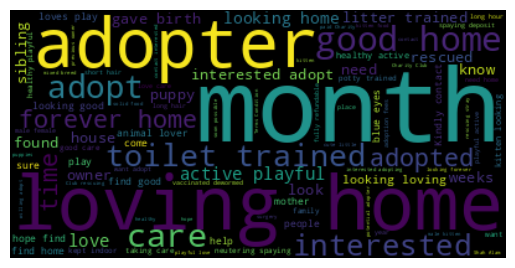

In [15]:
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
sw_spacy = list(sw_spacy)
stop_words_2 = sw_spacy + list(STOPWORDS) + ["cats", "kittens", "week", "dogs", "call"]
#create the wordcloud object
wordcloud = WordCloud(stopwords = stop_words_2,
                      collocations=True, min_word_length = 4, collocation_threshold=3).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()


In [17]:
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")

matcher = Matcher(nlp.vocab)

patterns = [
    [{'POS':'ADJ'}, {'POS':'NOUN'}],
    ]
matcher.add("demo", patterns)

doc = nlp(wordcloud)
matches = matcher(doc)
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)

ValueError: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'wordcloud.wordcloud.WordCloud'>

#### For no adoption

In [ ]:
df_description_low = df_raw.query('adoptionspeed == 4 ').description

In [ ]:
df_description_low.value_counts()

description
Please feel free to contact us : Stuart                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
#create list from the description column
text_low = df_description_low.tolist() 

# to lower case
text_low = str(text_low)
#already lower case


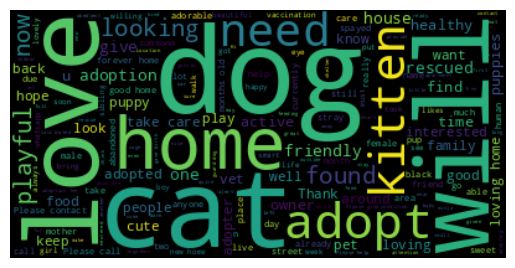

In [ ]:
#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text_low)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [ ]:
# create a dictionary of word frequencies
text_dictionary_low = wordcloud.process_text(text_low)
# sort the dictionary
word_freq_low={k: v for k, v in sorted(text_dictionary_low.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq_low = wordcloud.words_

#print results
print(list(word_freq_low.items())[:5])
print(list(rel_freq_low.items())[:5])

[('dog', 1445), ('cat', 1204), ('will', 1019), ('love', 1010), ('home', 912)]
[('dog', 1.0), ('cat', 0.8332179930795848), ('will', 0.7051903114186852), ('love', 0.698961937716263), ('home', 0.6311418685121107)]


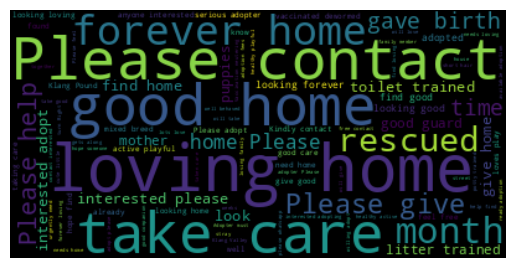

In [ ]:
#create more stopwords list
stop_words = ["cats", "kittens", "week", "dogs", "call"] + list(STOPWORDS)

#create the wordcloud object
wordcloud_2 = WordCloud(stopwords = stop_words,
                      collocations=True, min_word_length = 4, collocation_threshold=3).generate(text_low)

#plot the wordcloud object
plt.imshow(wordcloud_2, interpolation='bilInear')
plt.axis('off')
plt.show()